In [1]:
import scipy.stats as sps
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
plt.rcParams ['figure.figsize'] = [20, 5]

In [3]:
def bins_calculation(sample, border):
    return (int((max(sample) - min(sample) / border)) + 1) * 5

In [4]:
def compare_with_continuous_dist(distribution, distribution_text, bins_calculation, border):
    plt.subplots_adjust(wspace=0.3, hspace=0.4)
    for i, N in enumerate({10, 50, 1000}):
        plt.subplot(1, 3, i + 1)
        sample = distribution.rvs(size=N)
        grid = np.linspace(-border, border, 1000)
        sns.histplot(data=sample, bins= bins_calculation(sample, border), stat='density')
        sns.lineplot(x=grid, y = distribution.pdf(grid), linewidth = 4, color="red")
        plt.title(f"Sampling from the {distribution_text} distribution N = {N}")
        plt.xlabel(f"{distribution_text} numbers")
        plt.xlim(-border, border)
    plt.savefig(f"{distribution_text}_distribution")

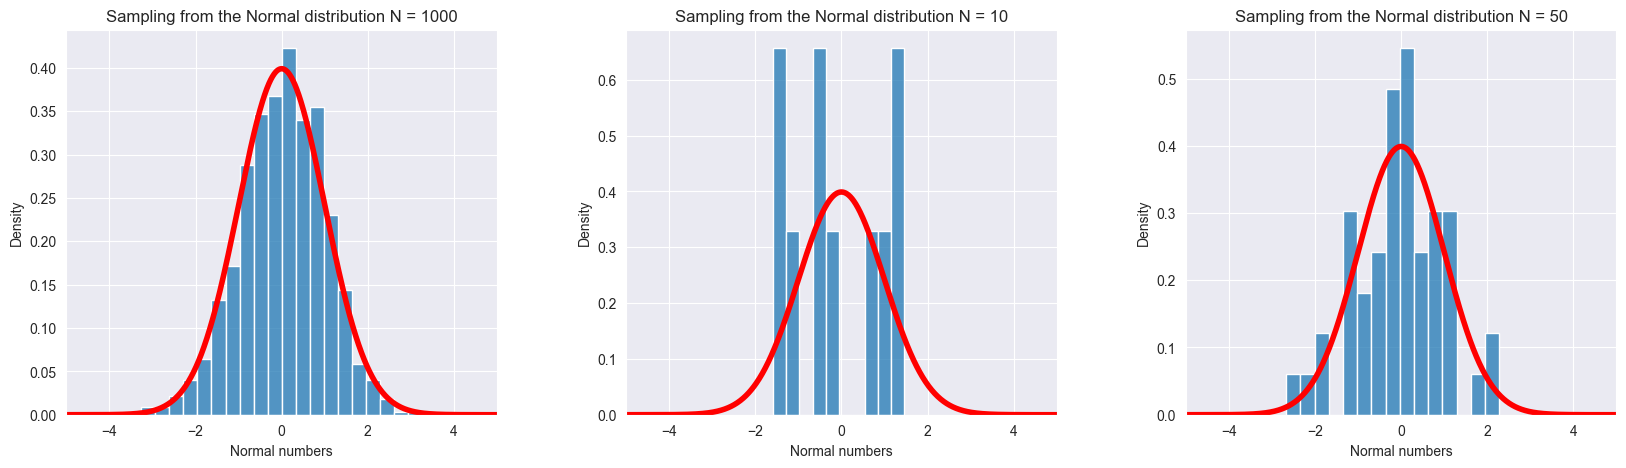

In [5]:
compare_with_continuous_dist(sps.norm, "Normal", bins_calculation, 5)

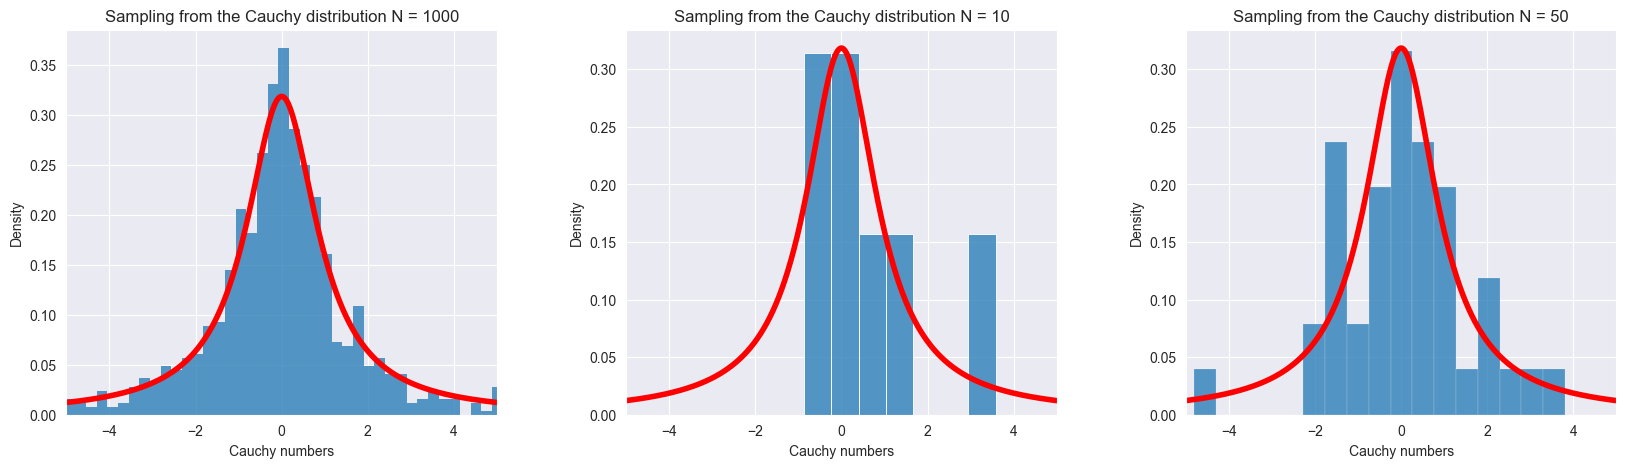

In [6]:
compare_with_continuous_dist(sps.cauchy, "Cauchy", bins_calculation, 5)

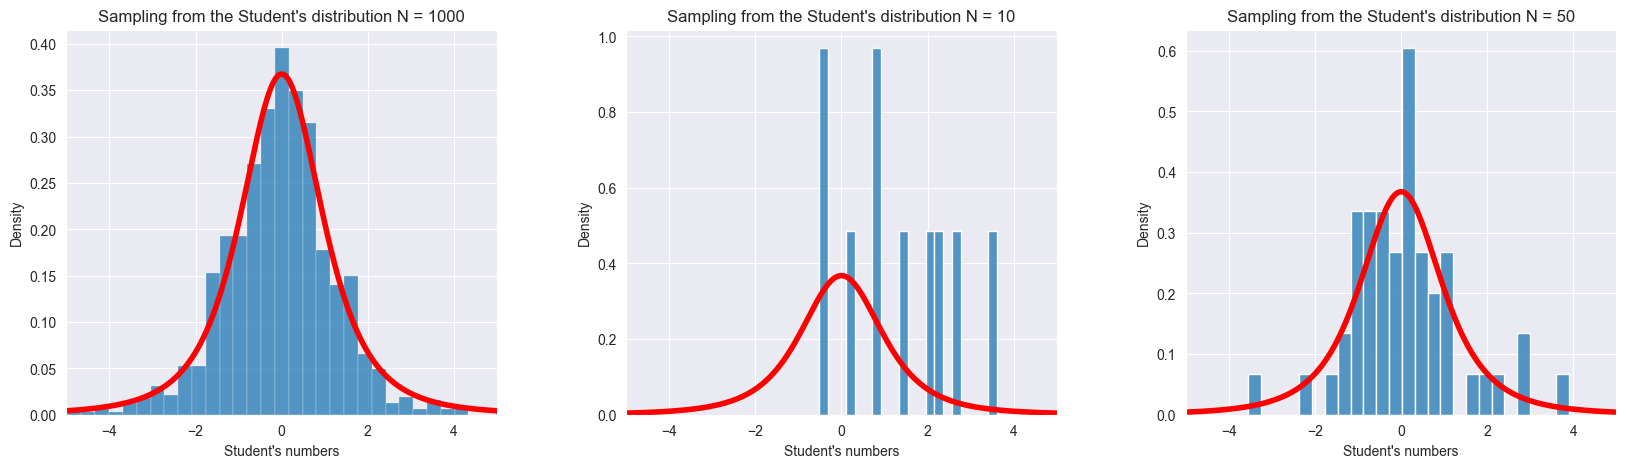

In [7]:
compare_with_continuous_dist(sps.t(3), "Student's", bins_calculation, 5)

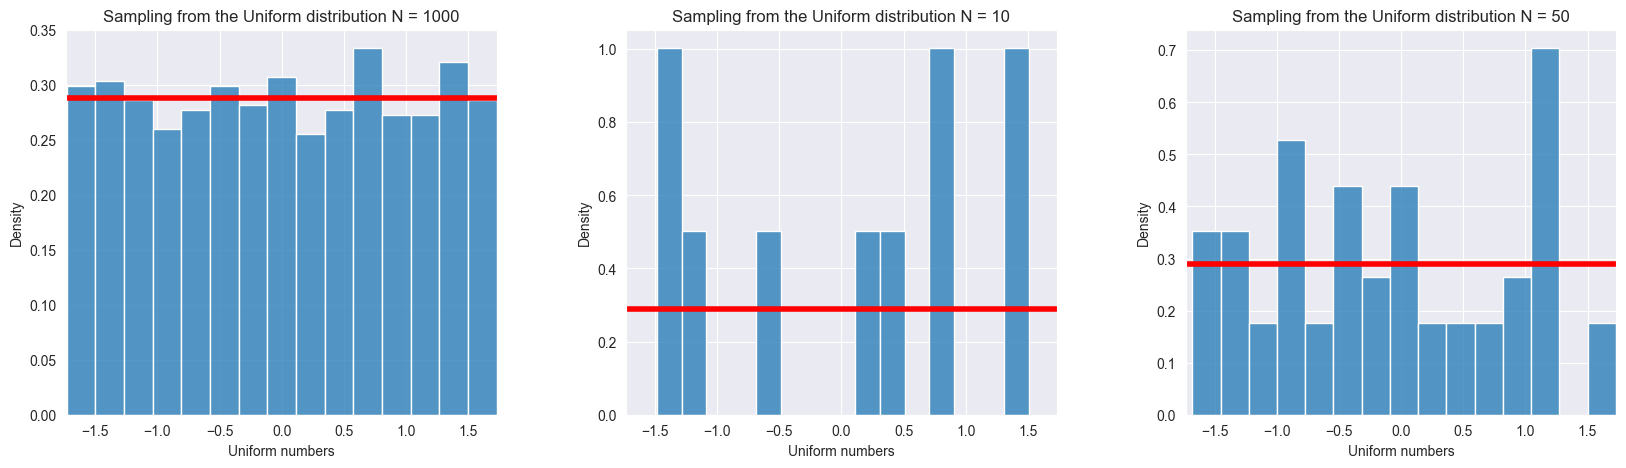

In [8]:
compare_with_continuous_dist(sps.uniform(loc=-3**0.5, scale = 2 * 3**0.5), "Uniform", bins_calculation, 3**0.5)

In [9]:
def compare_with_discrete_dist(distribution, distribution_text, bins_calculation, border):
    plt.subplots_adjust(wspace=0.3, hspace=0.4)
    for i, N in enumerate({20, 100, 500}):
        plt.subplot(1, 3, i + 1)
        sample = distribution.rvs(size=N)
        grid = range(0, border + 1)
        sns.histplot(data=sample, bins=10, stat='density')
        sns.lineplot(x=grid, y = distribution.pmf(grid), linewidth = 4, color="red")
        plt.title(f"Sampling from the {distribution_text} distribution N = {N}")
        plt.xlabel(f"{distribution_text} numbers")
        plt.xlim(0, border)
    plt.savefig(f"{distribution_text} distribution")

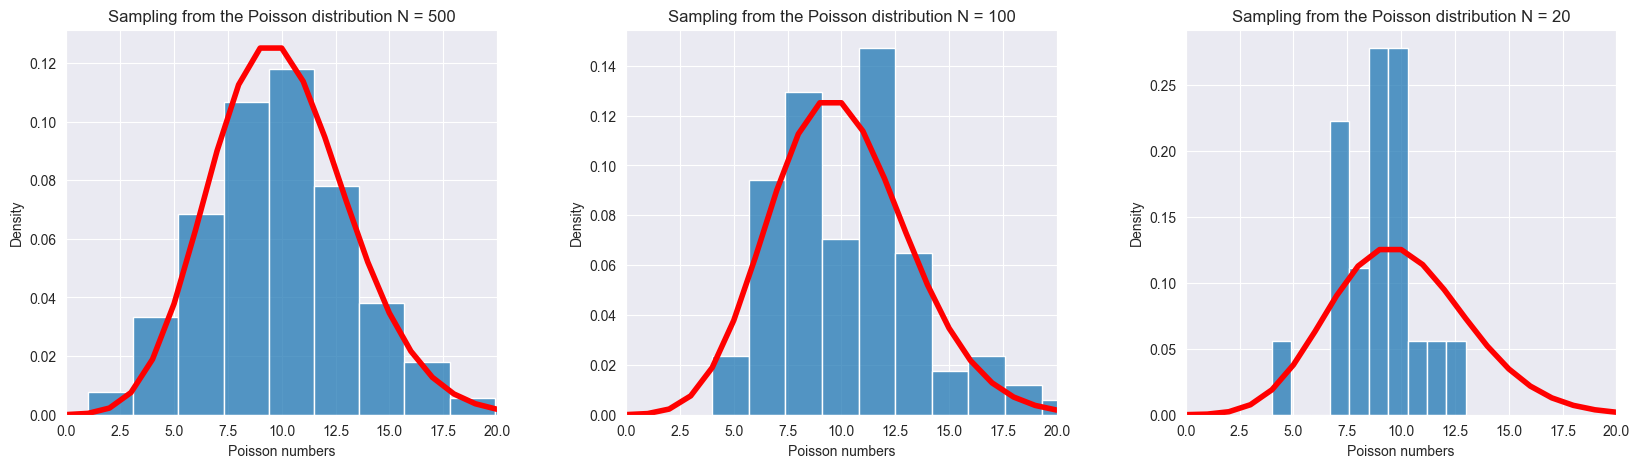

In [10]:
compare_with_discrete_dist(sps.poisson(10), "Poisson", bins_calculation, 20)